# Evaluación Módulo 3 : Programa lealtad de una aerolínea

## FASE 1: EDA:Exploración inicial de los datos

### Liberías y carga de datos

In [57]:
# En primer lugar, importamos las librerías que nos harán falta, desde el soporte:

# Para tratamiento de datos

import pandas as pd 
import numpy as np 

# Procesos de imputación

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visuaicación de resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

In [2]:
# Carga de csv (1):

df_flight = pd.read_csv("files/Customer_Flight_Activity.csv")

df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [3]:
# Carga de csv (2) :

df_loyalty = pd.read_csv("files/Customer_Loyalty_History.csv")

df_loyalty.head(2)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


### EDA: Customer_Flight_Activity.csv

In [4]:
# Forma del conjunto de datos: (filas, columnas)

df_flight.shape

(405624, 10)

In [5]:
# Porcentaje de nulos por columna

df_flight.isna().sum()/df_flight.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [6]:
# Duplicados totales del conjunto de datos

df_flight.duplicated().sum()

np.int64(1864)

In [7]:
"""Muestra de duplicados del conjunto de datos, de la columna "Loyalty Number", que es la columna
que podría causar conflictos, ya que representa un identificador único"""

df_flight[df_flight.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number").head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169010,100018,2017,11,13,1,14,3374,337.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0


In [8]:
# Revisión de columnas

def revision_columnas(df):

    for c in df.columns:
        
        print(f"Valores únicos en la columna '{c}':\n{df[c].unique()}\n")


In [9]:
"""Aunque no todas las columnas requieren un análisis de valores únicos,
se aplica unique() de forma general mediante una función para mantener un
proceso uniforme y aprovechar la eficiencia del procesamiento en bloque."""

revision_columnas(df_flight)

Valores únicos en la columna 'Loyalty Number':
[100018 100102 100140 ... 999731 999788 999891]

Valores únicos en la columna 'Year':
[2017 2018]

Valores únicos en la columna 'Month':
[ 1  9  2  3 11  4  5  7  6  8 10 12]

Valores únicos en la columna 'Flights Booked':
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

Valores únicos en la columna 'Flights with Companions':
[ 0  4  7  1  6  3  5  2 10  8  9 11]

Valores únicos en la columna 'Total Flights':
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

Valores únicos en la columna 'Distance':
[1521 2030 1200 ... 1217  617 4135]

Valores únicos en la columna 'Points Accumulated':
[152.   203.   120.   ...  18.75 601.   626.  ]

Valores únicos en la columna 'Points Redeemed':
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 

In [10]:
df_flight.info()

# Los datos son de tipo "int" excepto puntos acumulados, que son de tipo float.
# La documentación no especifíca, que los puntos puedan ser con decimales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [11]:
# Podemos hacer una búsqueda de números decimales, o si son todos enteros, convertir a int (no hay nulos).

# OPCIONES: Con esta función, o haciendo un .sample() y a ojo.

def tiene_decimales_reales(columna):
    return ((columna %1)!= 0).sum()

#  columna %1 --> obtiene el residuo de dividir cada valor de la columna por 1
# y lo compara con que sea diferente a 0 con !=0
# sum() nos saca cuantos hay


In [12]:
tiene_decimales_reales(df_flight['Points Accumulated'])

# Sí, esto quiere decir que hay puntos acumulados fraccionados. Tipo: "23.5": Datos correctos ✅

np.int64(20937)

### EDA: Customer_Loyalty_History.csv

In [13]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
df_loyalty.shape

(16737, 16)

In [15]:
# Tipo de dato

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [16]:
# Cancelation year y month, en formato float por presencia de NaN (que son floats)

# Para tratamiento de datos futuro, podemos convertir "Enrollment year/month" en DATE

# Creamos una nueva columna en formato datetime que combine mes y año, para posibles análisis futuros.

# Para que no genere conflictos, tenemos qu poner por defecto día 1 en todos. (Más información en la documentación)

df_loyalty['Enrollment Date'] =pd.to_datetime(df_loyalty['Enrollment Year'].astype(str) + '-' + df_loyalty['Enrollment Month'].astype(str) + '-01')

In [17]:
df_loyalty['Enrollment Date'].sample(3)

6497    2012-11-01
1500    2018-06-01
12344   2017-09-01
Name: Enrollment Date, dtype: datetime64[ns]

In [18]:
# Porcentaje de nulos por columna

round(df_loyalty.isna().sum()/df_loyalty.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
Enrollment Date        0.00
dtype: float64

In [19]:
df_loyalty.duplicated().sum() # No tiene datos duplicados

np.int64(0)

In [20]:
# Aplicamos nuestra función de valores únicos: revision_columnas

revision_columnas(df_loyalty)

# Sólo son vuelos de Canadá


Valores únicos en la columna 'Loyalty Number':
[480934 549612 429460 ... 776187 906428 652627]

Valores únicos en la columna 'Country':
['Canada']

Valores únicos en la columna 'Province':
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Valores únicos en la columna 'City':
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

Valores únicos en la columna 'Postal Code':
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V

In [21]:
df_loyalty.describe(include="O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


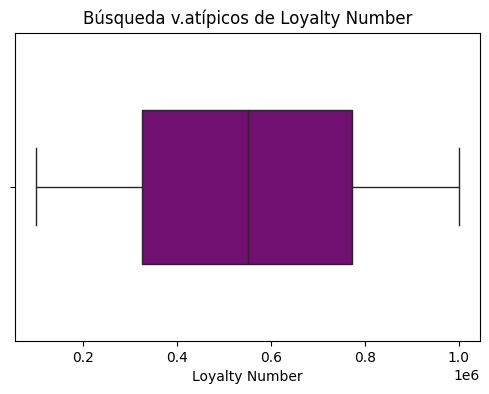

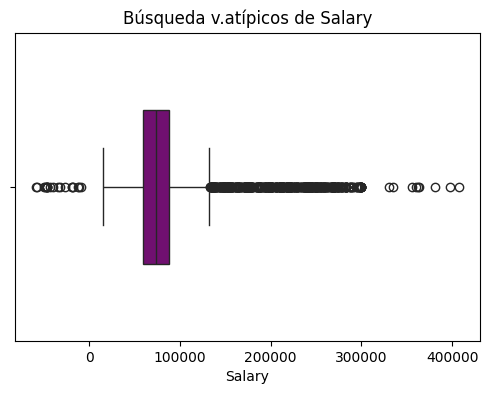

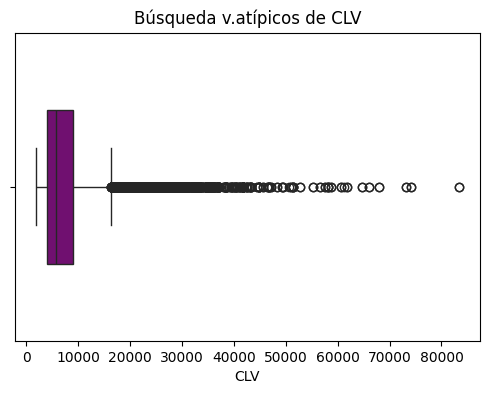

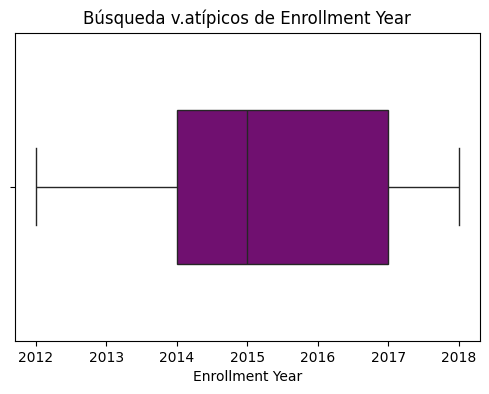

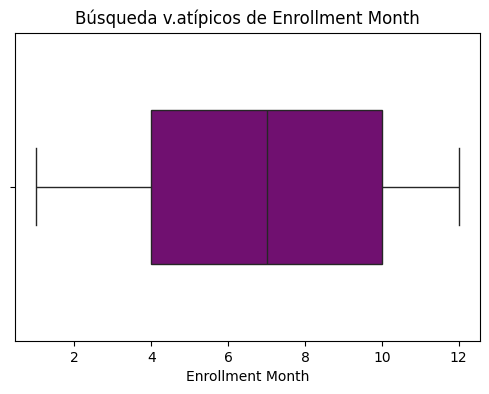

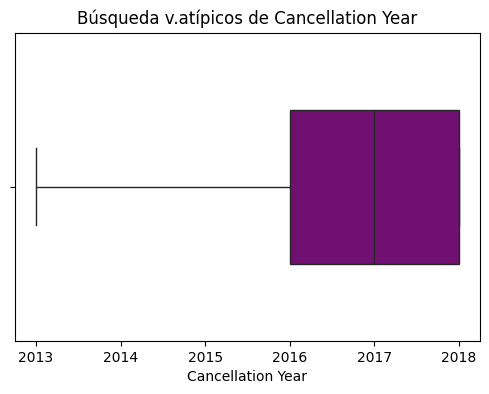

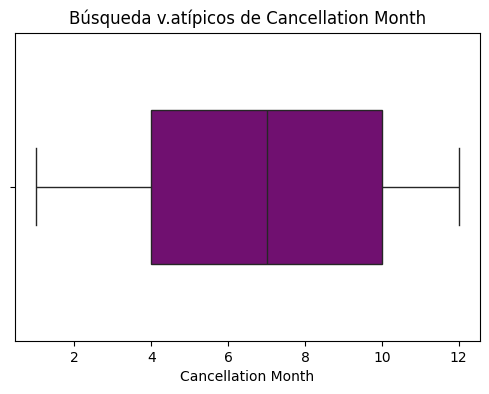

In [22]:
# Lista de columnas del DataFrame
columnas_numericas = df_loyalty.select_dtypes(include=['int64', 'float64']).columns

# Iterar sobre cada columna
for col in columnas_numericas:
        plt.figure(figsize=(6, 4)) 
        sns.boxplot(x=col, 
                    data=df_loyalty, 
                    width=0.5, 
                    color="purple")
        plt.title(f"Búsqueda v.atípicos de {col}")  
        plt.show()

# Encontramos bastantes valores atípicos en : salary y CLV
#CLV sin problema, porque son aportaciones que el cliente aporta a la empresa, puede ser alta.


In [23]:
df_loyalty['Salary'] = df_loyalty['Salary'].abs()

<Axes: xlabel='Salary'>

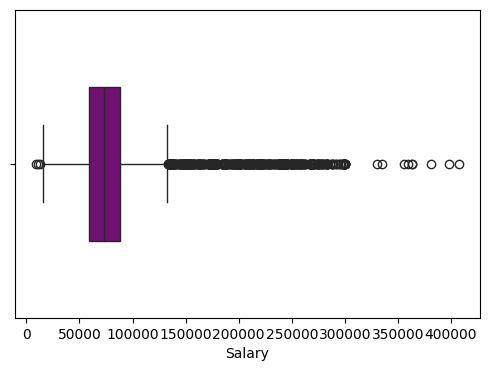

In [24]:
plt.figure(figsize=(6, 4)) 
sns.boxplot(x=df_loyalty['Salary'], 
                    data=df_loyalty, 
                    width=0.5, 
                    color="purple")

In [25]:
min_salary, max_salary = df_loyalty['Salary'].min(), df_loyalty['Salary'].max()
print(f"Valor mínimo de Salary: {min_salary}")
print(f"Valor máximo de Salary: {max_salary}")

Valor mínimo de Salary: 9081.0
Valor máximo de Salary: 407228.0


In [26]:
df_loyalty['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [27]:
round(df_loyalty.isna().sum()/df_loyalty.shape[0]*100, 2)

# Al filtrar datos por salarios, tenemos nueva información sobre nulos.

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
Enrollment Date        0.00
dtype: float64

In [28]:
# ¿Otra opción podría haber sido, convertir a nulos los valores atipicos negativos, y despues hacer una imputacion con la media?

In [29]:
# Relevancia de las columnas Cancellation Year, y Cancellation Month ante la gran proporción de nulos.
# Se valorará después de la unión, ya que en Customer Flight Analysis.csv, tenemos mas volumen de datos

### Unión de conjunto de datos

In [30]:
# Unión de tipo:
# Datos coincidentes de los datos "df_flight" con los datos de "df_loyalty"

# Claro, porque en flight tenemos valores de id repetirdos, xq depende de la fecha, si lo
#hacemso al reves perdemos info.

In [31]:
df_airline = df_flight.merge(df_loyalty, how='left', on='Loyalty Number') 

In [32]:
round(df_airline.isna().sum()/df_airline.shape[0]*100, 2)


Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                         25.31
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.66
Cancellation Month             87.66
Enrollment Date                 0.00
dtype: float64

In [33]:
# Nulos en salario

# Filtrar solo las filas donde 'Salary' es NaN
df_salary_nan = df_airline[df_airline['Salary'].isna()]

In [34]:
# Utilizando de nuevo nuestra función, podemos deducir:

revision_columnas(df_salary_nan)

# Todos nuestros valores nulos, corresponden a la columna Education-->["Collage"]


Valores únicos en la columna 'Loyalty Number':
[100102 100140 100737 ... 997710 998972 999304]

Valores únicos en la columna 'Year':
[2017 2018]

Valores únicos en la columna 'Month':
[ 1  9 12  4  8 10  3  2  5  6  7 11]

Valores únicos en la columna 'Flights Booked':
[10  6  0 11  8  2  3  4  5  1 13  7 12 16  9 17 15 20 14 18 21 19]

Valores únicos en la columna 'Flights with Companions':
[ 4  0  6  7  5  3  1  8  2  9 10 11]

Valores únicos en la columna 'Total Flights':
[14  6  0 12 11  8 15  2  4 17 10  5  1 18 21  7  3 16 22  9 13 20 19 23
 25 28 27 24 26 30 31 29 32]

Valores únicos en la columna 'Distance':
[2030 1200    0 ... 3964  617 1237]

Valores únicos en la columna 'Points Accumulated':
[203.   120.     0.   ... 151.5   23.76  18.36]

Valores únicos en la columna 'Points Redeemed':
[  0 341 343 389 324 409 327 322 323 366 300 670 517 340 444 367 333 293
 443 455 356 405 466 305 396 336 348 353 484 328 312 417 299 395 337 321
 392 448 376 431 414 477 362 370 349 496 510 

In [35]:
# Visualizamos media y mediana de salario

print(f'La media de salario es : {df_airline["Salary"].mean()}')
print(f'La mediana de salario es : {df_airline["Salary"].median()}')

# Como tenemos gran número de valores atipicos por el rango superior, la mediana es más fiable

La media de salario es : 79381.44022815496
La mediana de salario es : 73479.0


In [36]:
"""Hacemos una imputación de esos valores nulos por la mediana, para
mantener la integridad del análisis, a diferencia de que estableciesemos
que los estudiantes al no tener salario, el salario es 0, que puede darnos
problemas"""

'Hacemos una imputación de esos valores nulos por la mediana, para\nmantener la integridad del análisis, a diferencia de que estableciesemos\nque los estudiantes al no tener salario, el salario es 0, que puede darnos\nproblemas'

In [37]:
# Imputación por mediana

imputer = SimpleImputer(strategy='median')

df_airline['Salary'] = imputer.fit_transform(df_airline[['Salary']]) 


In [38]:
round(df_airline.isna().sum()/df_airline.shape[0]*100, 2)

# Conjunto de datos SIN NULOS

Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                          0.00
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.66
Cancellation Month             87.66
Enrollment Date                 0.00
dtype: float64

In [39]:
df_airline.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Enrollment Date
127975,614246,2017,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,College,73479.0,Married,Nova,4015.21,Standard,2012,5,NaN,NaN,2012-05-01
210843,528332,2018,1,11,0,11,2343,234.0,0,0,Canada,Ontario,Toronto,P1W 1K4,Female,College,73479.0,Married,Nova,2993.02,Standard,2015,10,NaN,NaN,2015-10-01
147813,767908,2017,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,76296.0,Divorced,Nova,8084.85,Standard,2017,1,NaN,NaN,2017-01-01
44301,287927,2018,9,6,4,10,3750,375.0,465,38,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,66470.0,Married,Star,2595.75,Standard,2017,6,NaN,NaN,2017-06-01
310292,783515,2018,11,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,63676.0,Married,Nova,5669.97,Standard,2013,7,2017.0,5.0,2013-07-01
353587,928957,2018,9,2,0,2,1496,149.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,68872.0,Married,Star,2480.49,Standard,2017,3,NaN,NaN,2017-03-01
315103,679132,2018,7,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,Master,128118.0,Married,Star,3873.65,Standard,2018,7,NaN,NaN,2018-07-01
119495,164363,2017,8,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,50064.0,Single,Star,8200.27,Standard,2012,7,NaN,NaN,2012-07-01
305987,195594,2018,7,0,0,0,0,0.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,88792.0,Married,Star,3985.40,Standard,2012,5,NaN,NaN,2012-05-01
207311,341594,2018,1,5,2,7,861,86.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,70302.0,Married,Star,4187.78,Standard,2015,9,NaN,NaN,2015-09-01


<Axes: xlabel='Loyalty Card', ylabel='CLV'>

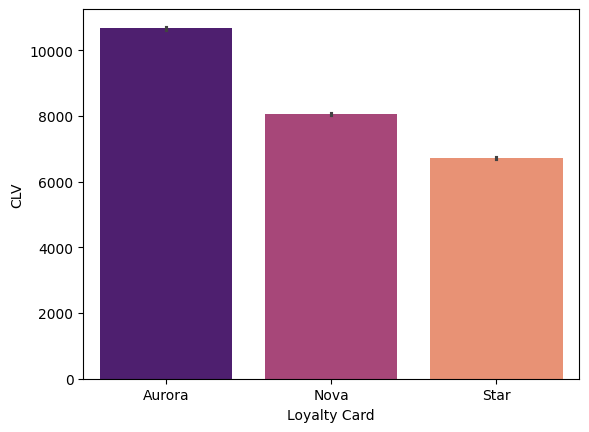

In [40]:
# 1 ¿Existe relación? --> Visualización

sns.barplot(x = "Loyalty Card", 
            y = "CLV", 
            data = df_airline, 
            palette = "magma")

In [41]:
# No hay relación entre el dinero que cada cliente aporta a la empresa y la tarjeta de lealtad. No imputo.

In [42]:
#Guardamos CSV
df_airline.to_csv("files/Flight_Loyalty(union).csv")

## FASE 2: Visualizaciones

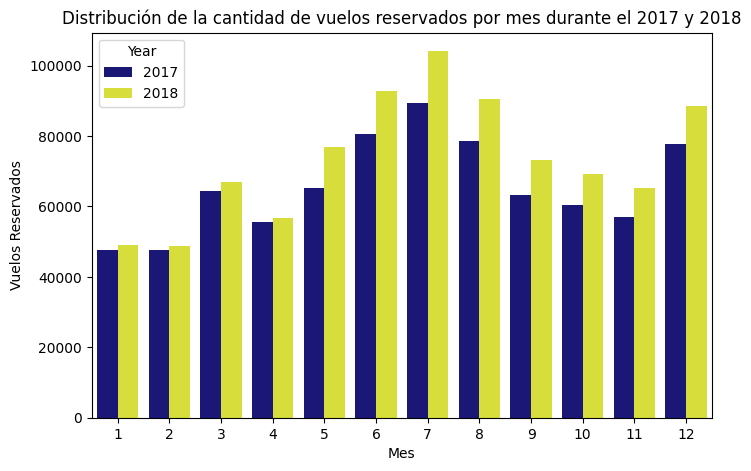

In [43]:
#1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Agrupar los datos por Año y Mes y sumar los vuelos reservados
df_flights_por_mes = df_airline.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Creación de un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Flights Booked', data=df_flights_por_mes, hue='Year', palette='plasma')


plt.title('Distribución de la cantidad de vuelos reservados por mes durante el 2017 y 2018')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.show()

# plt.savefig("Imágenes y gráficas/Distribución de la cantidad de vuelos reservados por mes durante el 2017 y 2018.jpg", format="jpg", dpi=300, bbox_inches="tight")

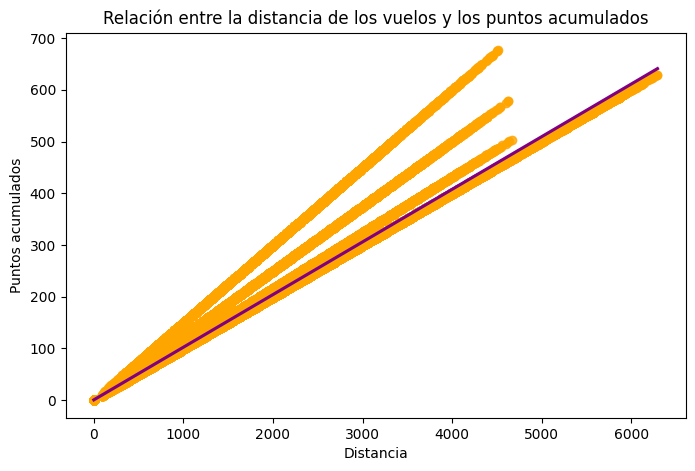

In [44]:
#2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.regplot(x='Distance', y='Points Accumulated', data=df_airline, scatter_kws={'color':'orange'}, line_kws={'color':'purple'})

# Configuración del gráfico
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.show()

# plt.savefig("Imágenes y gráficas/Relación entre la distancia de los vuelos y los puntos acumulados.jpg", format="jpg", dpi=300, bbox_inches="tight")

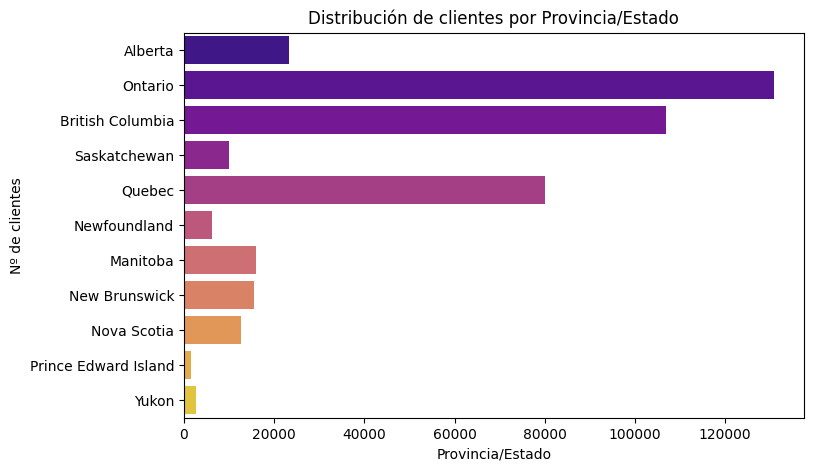

In [45]:
#3.¿Cuál es la distribución de los clientes por provincia o estado?

plt.figure(figsize=(8, 5))  # Tamaño del gráfico
sns.countplot(data=df_airline, y='Province', palette='plasma')

# Configuración del gráfico
plt.title('Distribución de clientes por Provincia/Estado')
plt.xlabel('Provincia/Estado')
plt.ylabel('Nº de clientes')
plt.show()

# plt.savefig("Imágenes y gráficas/Distribución de clientes por Provincia Estado.jpg", format="jpg", dpi=300, bbox_inches="tight")

In [46]:
#4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Calculamos el salario promedio, por nivel educativo, utilizando un group by

sal_prom_edu= df_airline.groupby('Education')['Salary'].mean()
print(sal_prom_edu.values)
print(sal_prom_edu.index)

[ 72601.23503263  73479.         178335.43951613  61112.37752525
 103767.49416342]
Index(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'], dtype='object', name='Education')


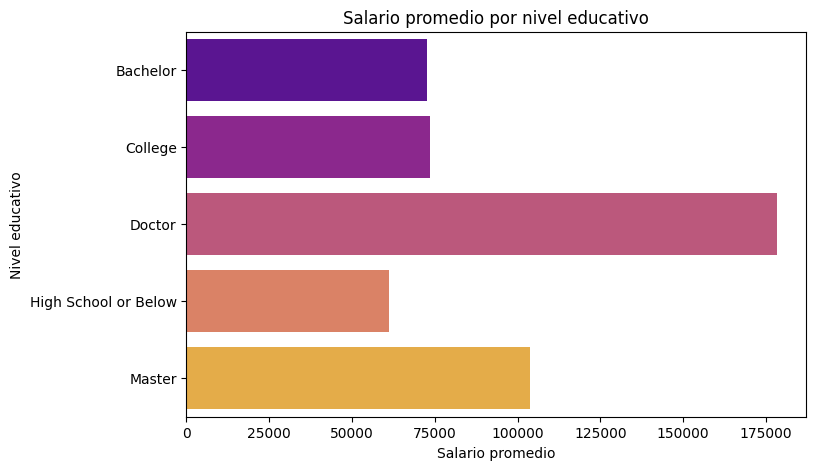

In [47]:
# Crear el gráfico de barras con el salario en el eje X y los niveles educativos en el eje Y
plt.figure(figsize=(8, 5))
sns.barplot(x=sal_prom_edu.values, y=sal_prom_edu.index, palette='plasma')

# Configuración del gráfico
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Salario promedio')
plt.ylabel('Nivel educativo')
plt.show()

# plt.savefig("Imágenes y gráficas/Salario promedio por nivel educativo.jpg", format="jpg", dpi=300, bbox_inches="tight")

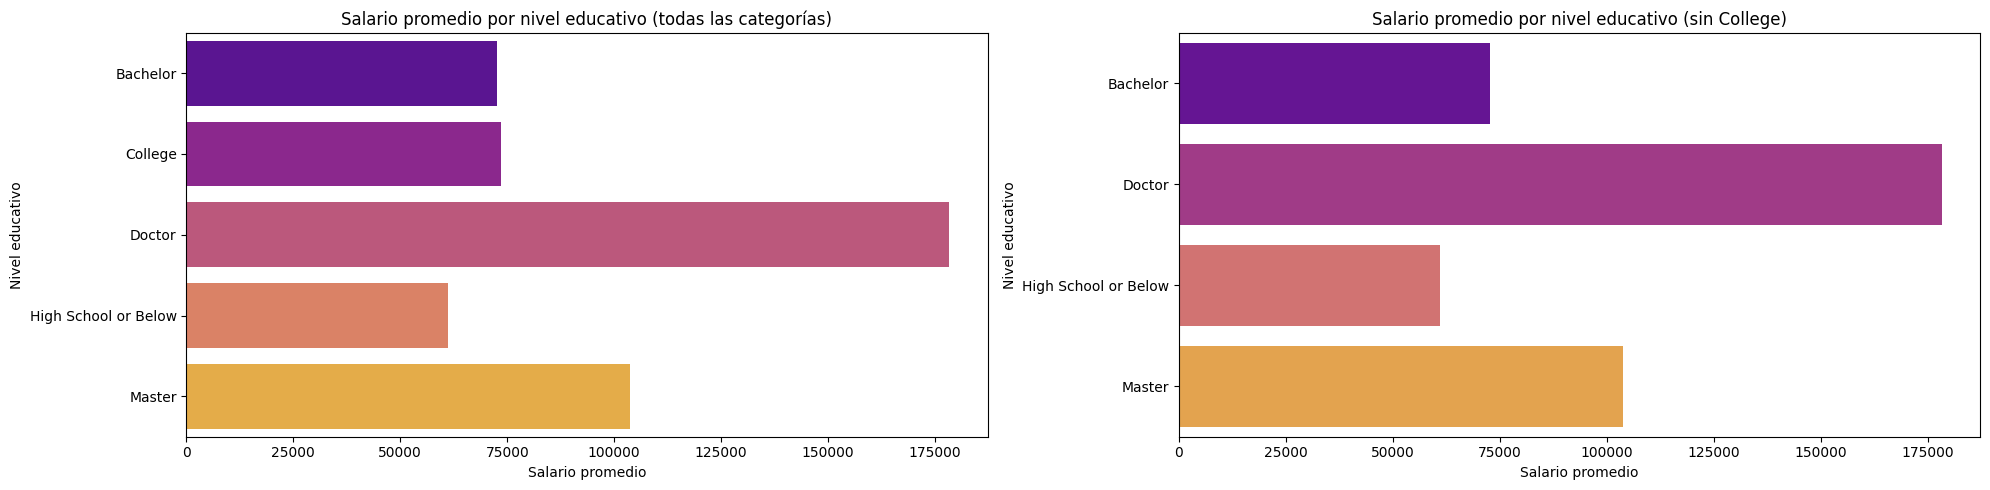

In [48]:
# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Filtrar los datos para todos los niveles educativos (incluyendo "College")
sal_prom_edu_all = df_airline.groupby('Education')['Salary'].mean()

# Filtrar los datos para los niveles educativos sin "College"
df_airline_no_college = df_airline[df_airline['Education'] != 'College']
sal_prom_edu_no_college = df_airline_no_college.groupby('Education')['Salary'].mean()

# Gráfico con todas las categorías de educación
sns.barplot(x=sal_prom_edu_all.values, y=sal_prom_edu_all.index, palette='plasma', ax=axes[0])
axes[0].set_title('Salario promedio por nivel educativo (todas las categorías)')
axes[0].set_xlabel('Salario promedio')
axes[0].set_ylabel('Nivel educativo')

# Gráfico sin "College"
sns.barplot(x=sal_prom_edu_no_college.values, y=sal_prom_edu_no_college.index, palette='plasma', ax=axes[1])
axes[1].set_title('Salario promedio por nivel educativo (sin College)')
axes[1].set_xlabel('Salario promedio')
axes[1].set_ylabel('Nivel educativo')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# plt.savefig("Imágenes y gráficas/Comparación College.jpg", format="jpg", dpi=300, bbox_inches="tight")


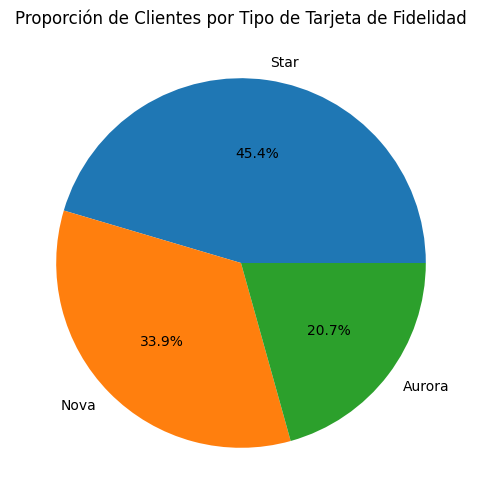

In [49]:
#5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(df_airline['Loyalty Card'].value_counts(), 
        labels=df_airline['Loyalty Card'].value_counts().index,
                autopct='%1.1f%%')

# Configuración del gráfico
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()

# plt.savefig("Imágenes y gráficas/Proporción de Clientes por Tipo de Tarjeta de Fidelidad.jpg", format="jpg", dpi=300, bbox_inches="tight")

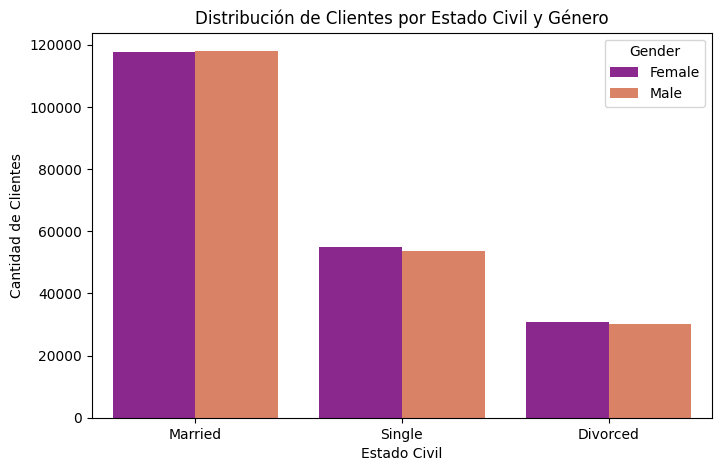

In [50]:
#6.¿Cómo se distribuyen los clientes según su estado civil y género?

import seaborn as sns
import matplotlib.pyplot as plt

# Crear countplot para mostrar la distribución de Estado Civil por Género
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital Status', hue='Gender', data=df_airline, palette='plasma')

# Configuración del gráfico
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.show()

# plt.savefig("Imágenes y gráficas/Distribución de Clientes por Estado Civil y Género.jpg", format="jpg", dpi=300, bbox_inches="tight")


## FASE 3: BONUS

Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

 Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
 significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
 pasos que deberás seguir son:

 . Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
 'Flights Booked' y 'Education'.

 . Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
 básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
 grupo.
 
 . Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
 significativa en el número de vuelos reservados entre los diferentes niveles educativos.

### Preparación de los datos

In [54]:
# Utilizamos df_airline

df_bonus=df_airline[['Flights Booked', 'Education']]

df_bonus.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


### Análisis descriptivo

In [56]:
df_bonus.groupby("Education").describe()

Flights Booked                                          \
                              count      mean       std  min  25%  50%  75%   
Education                                                                     
Bachelor                   253752.0  4.091093  5.216995  0.0  0.0  1.0  8.0   
College                    102672.0  4.153012  5.242136  0.0  0.0  1.0  8.0   
Doctor                      17856.0  4.146281  5.250093  0.0  0.0  1.0  8.0   
High School or Below        19008.0  4.155777  5.234551  0.0  0.0  1.0  8.0   
Master                      12336.0  4.184014  5.210294  0.0  0.0  1.0  8.0   

                            
                       max  
Education                   
Bachelor              21.0  
College               21.0  
Doctor                21.0  
High School or Below  21.0  
Master                21.0

### Prueba estadística

In [58]:
"""Prueba de hipótesis para determinar si existe una diferencia
 significativa en el número de vuelos reservados entre los diferentes niveles educativos."""

# vamos a definir una función para poder hacer el t-test de Student
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
   # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [60]:
# Filtamos por educacion

df_bonus['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
grupo_Bachelor = df_bonus[df_bonus['Education'] == 'Bachelor']["Flights Booked"]
grupo_College = df_bonus[df_bonus['Education'] == 'College']["Flights Booked"]
grupo_Master = df_bonus[df_bonus['Education'] == 'Master']["Flights Booked"]
grupo_High = df_bonus[df_bonus['Education'] == 'High School or Below']["Flights Booked"]
grupo_Doctor = df_bonus[df_bonus['Education'] == 'Doctor']["Flights Booked"]

prueba_hipotesis(grupo_Master,grupo_High)

In [ ]:
import itertools:
"""librería estándar de Python que contiene herramientas para manejar combinaciones,
permutaciones y otras operaciones sobre iterables"""

# Diccionario de grupos para iterar
grupos = {'Bachelor': grupo_Bachelor,'College': grupo_College,'Master': grupo_Master,'High School or Below': grupo_High,
'Doctor': grupo_Doctor}

# Probar todas las combinaciones de dos grupos
# Con grupos.items obtienes cada nivel educativo y su respectiva lista de vuelos reservados
# itertools.combinations te da todas las combinaciones posibles. El 2 indica para posibles de dos.
for (nombre1, datos1), (nombre2, datos2) in itertools.combinations(grupos.items(), 2):
    print(f"\nPrueba entre {nombre1} y {nombre2}")
    prueba_hipotesis(datos1, datos2)



Prueba entre Bachelor y College

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0018)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 12942655097.5000, p-valor: 0.0013
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)


Prueba entre Bachelor y Master

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1068)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 1545385275.5000, p-valor: 0.0116
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)


Prueba entre Bachelor y High School or Below

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1655)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 2391

In [ ]:
# Sólo hay diferencias significativas entre Barchelor y Master,High School or Below y College